In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from specim.specfuncs import spec1d

## The following is the part of the spectrum I am going to use for fit that would be reported. We decided to exclude Mg-b line and include H-beta line as that is favored by the tests. For more check the 'B0445_veldis_test_final' notebook.

In [8]:
spec = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[200, 2900])#[220, 3505]


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  5810.46
 Spectrum End:     7969.83
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5842.50
[Fe VII]      3761.40       5860.26
H-iota        3770.00       5873.66
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44



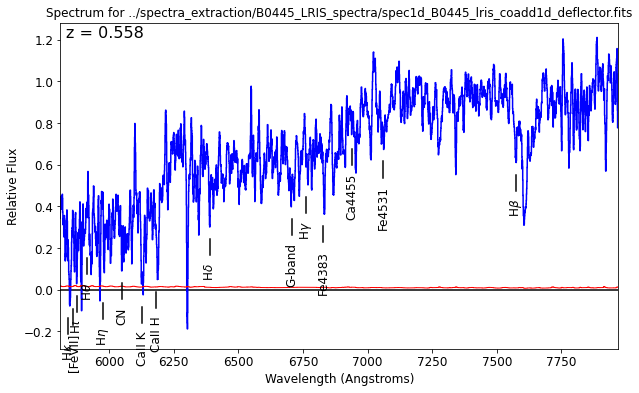

In [9]:
fg = plt.figure(figsize=(10,6))
spec.smooth(7, fig=fg)
spec.mark_lines('abs', z=0.558, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 35.100309 km/s


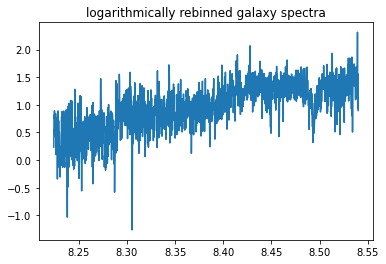

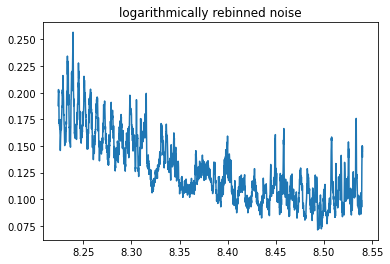

In [10]:
spec.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.12)

In [11]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22048.222261 

sigma_diff : 2.130182


## It seems we also need to mask two narrow line on both sides of Ca K+H.

In [114]:
mask_reg = np.log(np.array([(6095, 6110), (6210, 6225), (6295, 6311), (6850, 6890),
                            (7016, 7035), (7585, 7700)])/1.558) #(6095, 6105)
mask_reg #(7581, 7723)

array([[8.27182109, 8.2742791 ],
       [8.29051323, 8.29292577],
       [8.304108  , 8.30664647],
       [8.38860098, 8.39442342],
       [8.41254559, 8.41525002],
       [8.49052494, 8.50557266]])


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       196       175
chi2/DOF: 3.255; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       197       175
chi2/DOF: 3.251; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       197       171
chi2/DOF: 3.244; degree = 6; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       199       170
chi2/DOF: 3.241; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       

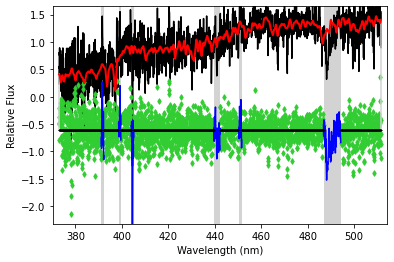

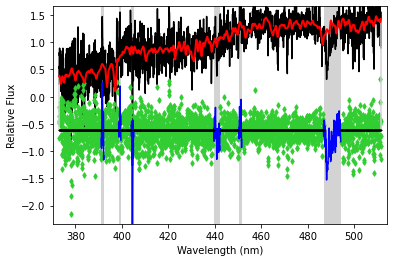

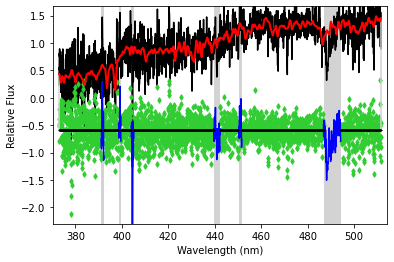

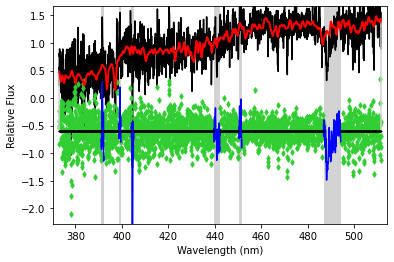

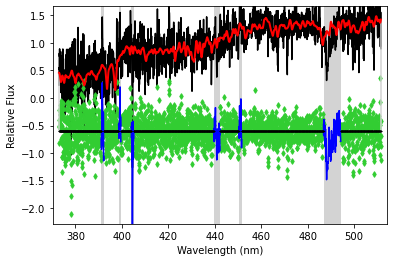

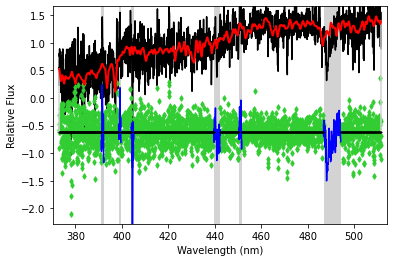

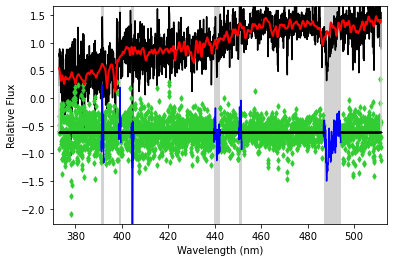

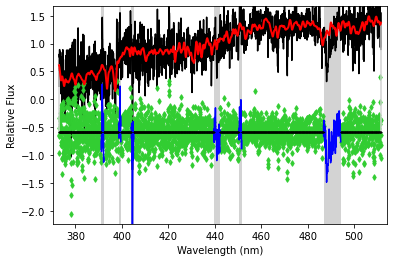

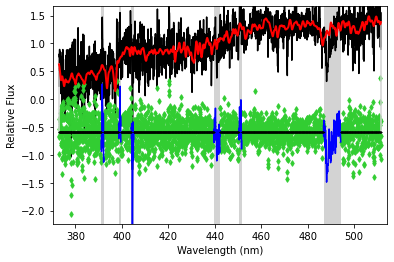

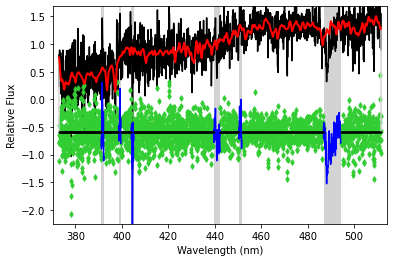

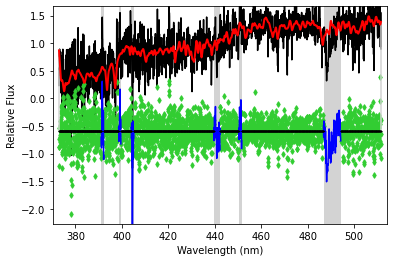

<Figure size 432x288 with 0 Axes>

In [115]:
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 15], mask_reg=mask_reg, show_weight=True, moments=2)

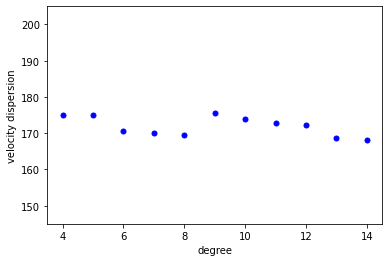

In [116]:
spec.plot_veldis(ylim=[145, 205])


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       195       179
chi2/DOF: 3.294; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       197       177
chi2/DOF: 3.289; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       198       172
chi2/DOF: 3.280; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       200       171
chi2/DOF: 3.276; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       

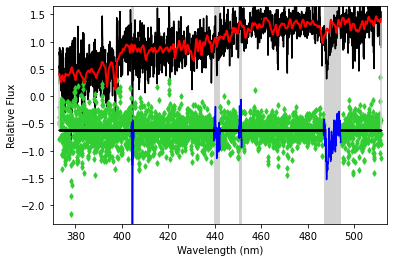

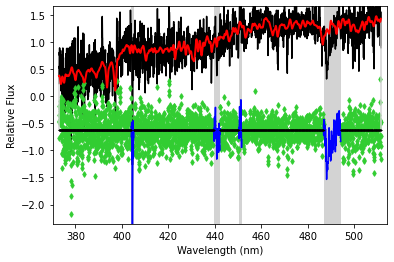

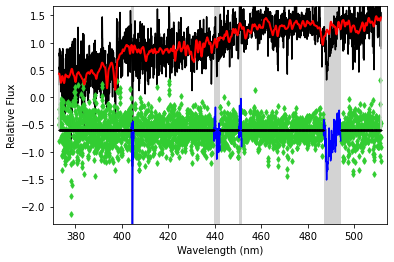

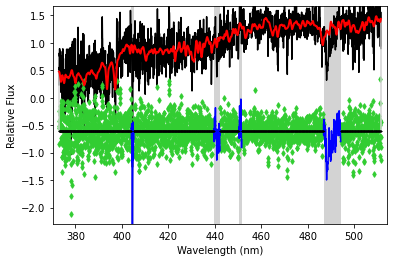

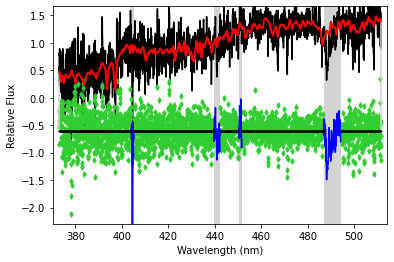

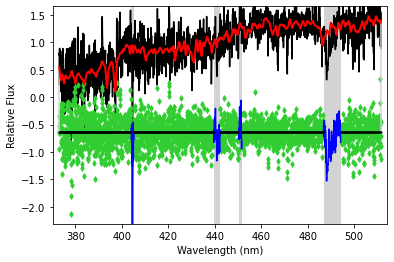

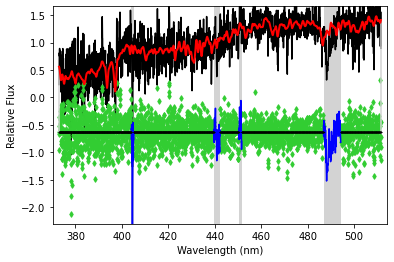

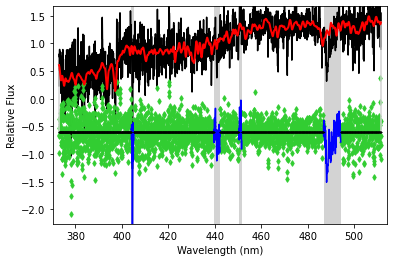

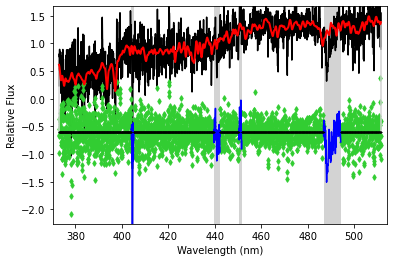

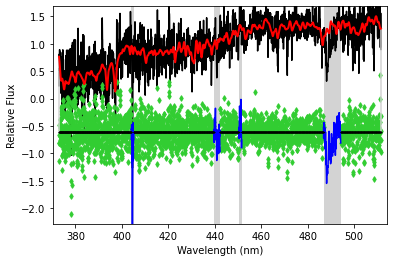

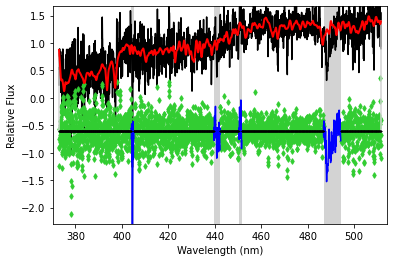

<Figure size 432x288 with 0 Axes>

In [49]:
# without two new masked line on both side Ca K+H. The mask_reg array has been modified.
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 15], mask_reg=mask_reg, show_weight=True, moments=2)

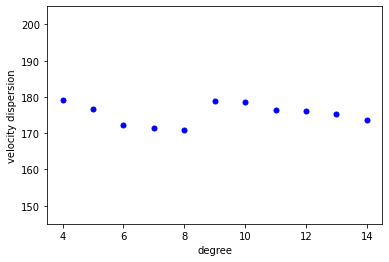

In [50]:
spec.plot_veldis(ylim=[145, 205])

order : 5


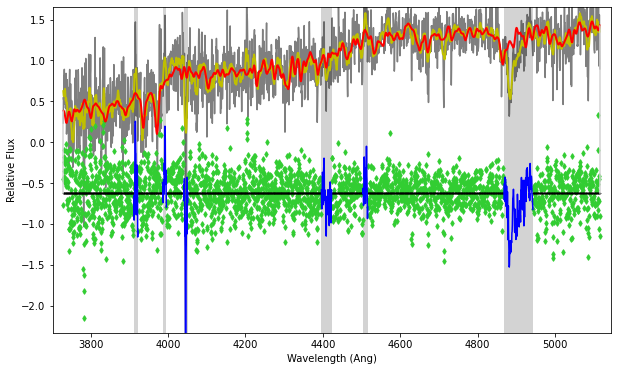

order : 12


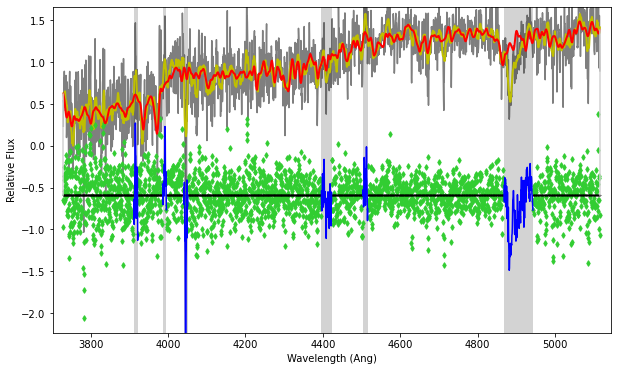

In [124]:
ord_list = np.array([5, 12])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

## Blue side

In [53]:
spec_b = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[200, 1500])


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  5810.46
 Spectrum End:     6849.88
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5842.50
[Fe VII]      3761.40       5860.26
H-iota        3770.00       5873.66
H-theta       3797.00       5915.73
H-eta         3835.00       5974.93
CN bandhd     3883.00       6049.71
CaII K        3933.67       6128.66
CaII H        3968.47       6182.88
H-delta       4101.00       6389.36
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71



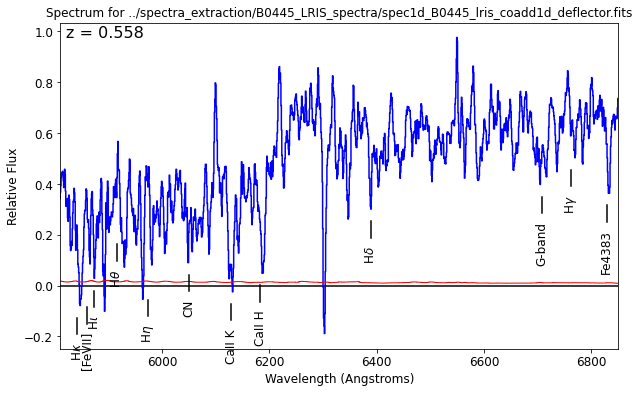

In [54]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(7, fig=fg)
spec_b.mark_lines('abs', z=0.558, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 37.980861 km/s


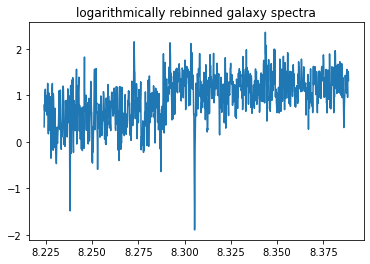

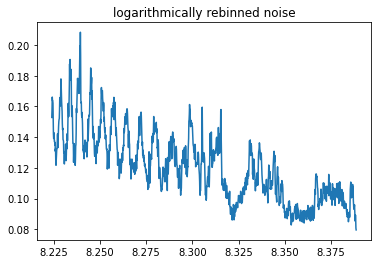

In [55]:
spec_b.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.12)

In [57]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -22048.222261 

sigma_diff : 2.130182


In [112]:
mask_reg_b = np.log(np.array([(6095, 6110), (6210, 6225),(6295, 6311), (6850, 6890),
                              (7016, 7035), (7585, 7700)])/1.558) #(6095, 6105)
mask_reg_b

array([[8.27182109, 8.2742791 ],
       [8.29051323, 8.29292577],
       [8.304108  , 8.30664647],
       [8.38860098, 8.39442342],
       [8.41254559, 8.41525002],
       [8.49052494, 8.50557266]])


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       166       196
chi2/DOF: 8.678; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       155       192
chi2/DOF: 8.639; degree = 3; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       156       192
chi2/DOF: 8.638; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       163       198
chi2/DOF: 8.601; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

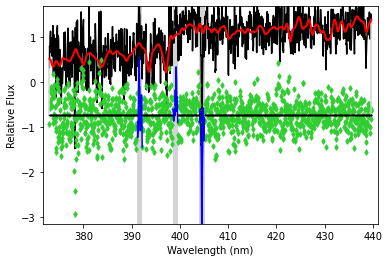

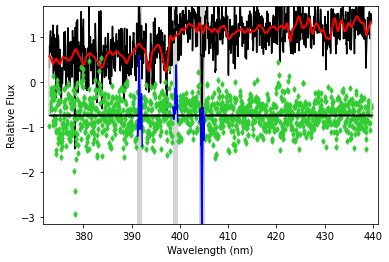

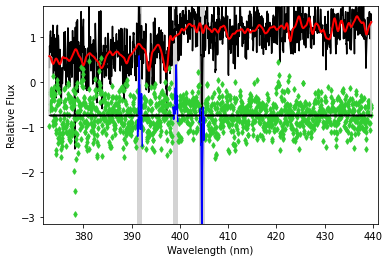

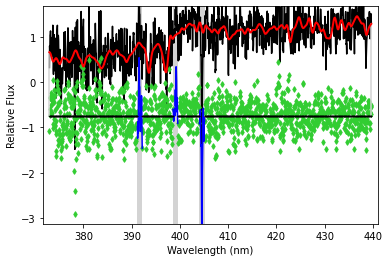

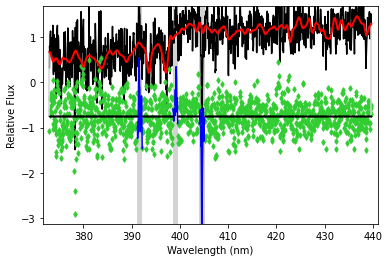

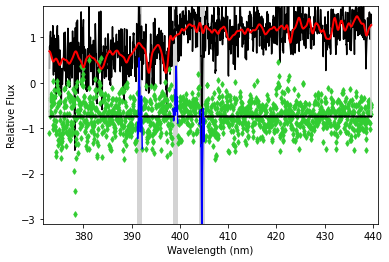

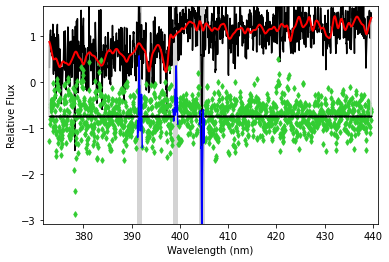

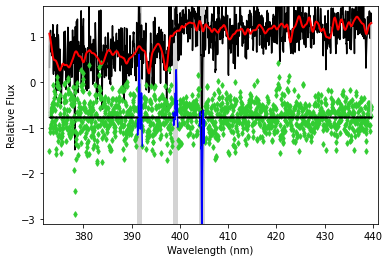

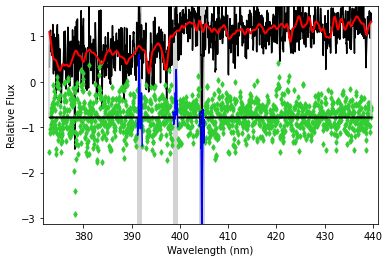

<Figure size 432x288 with 0 Axes>

In [113]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[2, 11], mask_reg=mask_reg_b, show_weight=True, moments=2)

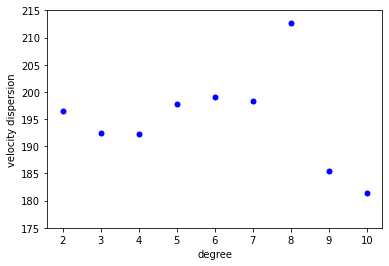

In [120]:
spec_b.plot_veldis(ylim=[175, 215])

order : 7


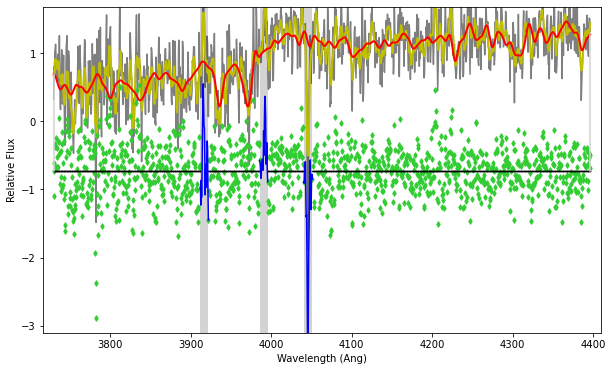

In [121]:
ord_list = np.array([7])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=7, fig=fg)
    print('order : %d' %od)
    plt.show()

## Red side

In [44]:
spec_r = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[1275, 2900])


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  6670.62
 Spectrum End:     7969.83
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30
H-beta        4861.00       7573.44



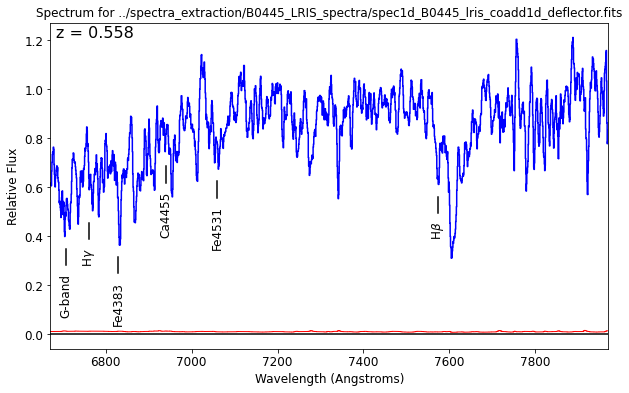

In [45]:
fg = plt.figure(figsize=(10,6))
spec_r.smooth(7, fig=fg)
spec_r.mark_lines('abs', z=0.558, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 32.849925 km/s


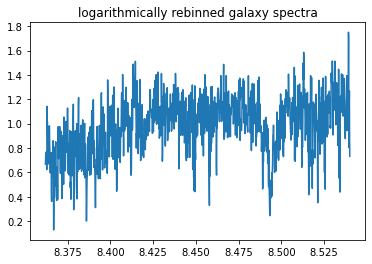

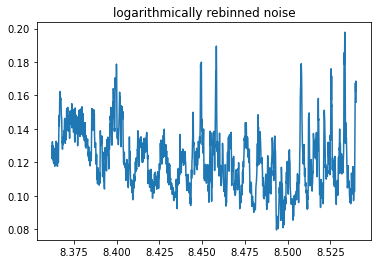

In [122]:
spec_r.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.12)

In [129]:
temp_spec_r = spec_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -63435.263867 

sigma_diff : 2.130182



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       184       168
chi2/DOF: 1.801; degree = 2; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 20; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       191       162
chi2/DOF: 1.793; degree = 3; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       193       164
chi2/DOF: 1.781; degree = 4; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 32; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       200       164
chi2/DOF: 1.771; degree = 5; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 29; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:      

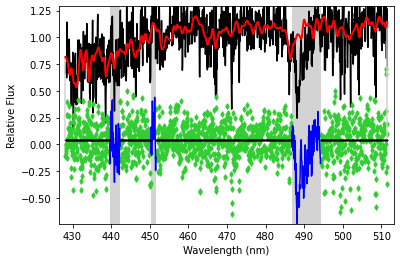

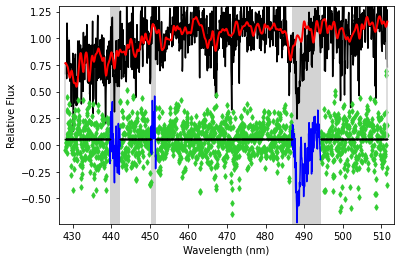

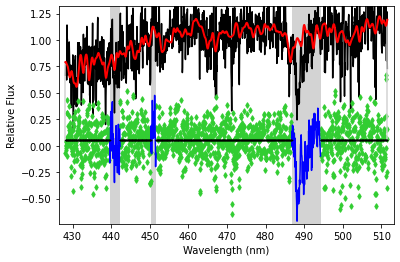

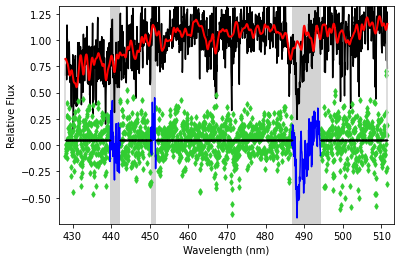

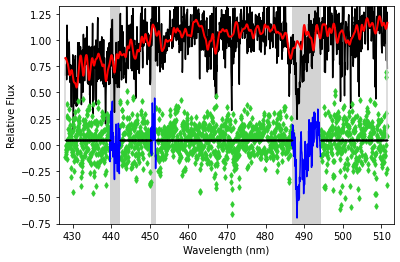

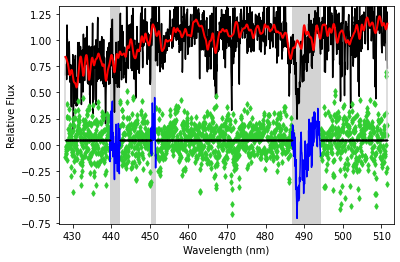

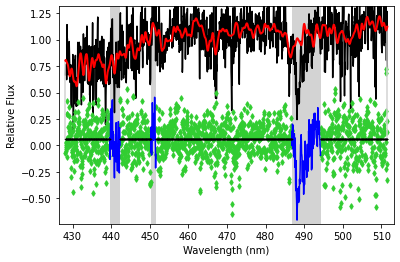

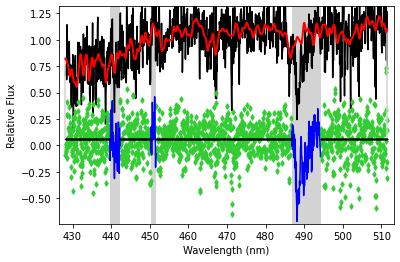

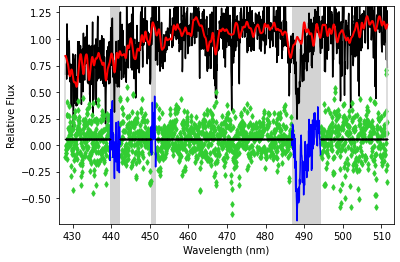

<Figure size 432x288 with 0 Axes>

In [130]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

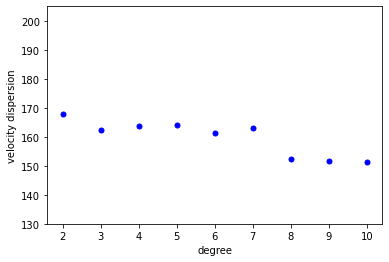

In [131]:
spec_r.plot_veldis(ylim=[130, 205])

order : 4


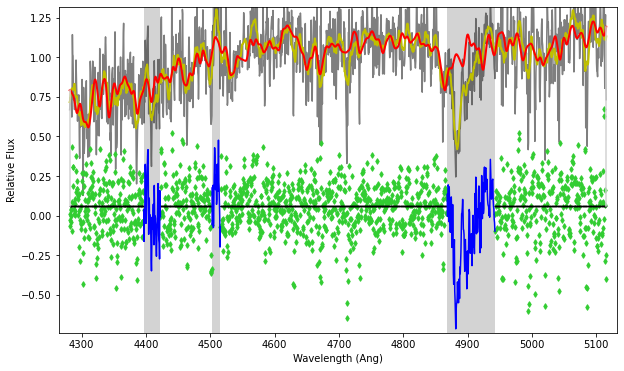

order : 8


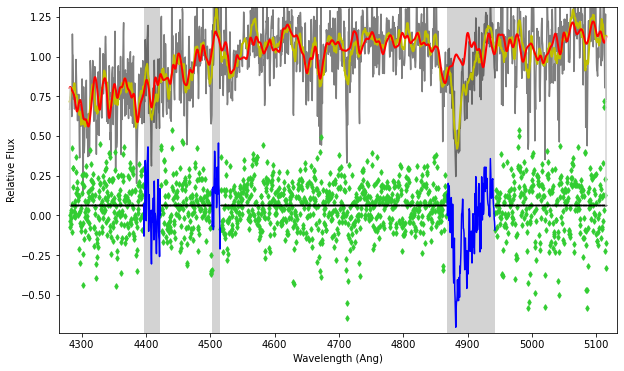

In [132]:
ord_list = np.array([4, 8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

## Results

## Systematic uncertainty

### Systematic uncertainty is calculated by changing wavelength range used to fit for velocity dispersion, degree of additive polynomial and template set. There are three choice for wavelength range- full spectrum, blue side and red side. There is some overlaping between blue side and red side.

In [133]:
veldis_array = []
discard_veldis = []

In [134]:
## full spectrum

addtive_deg_full = np.arange(4, 15)

for d in addtive_deg_full:
    for i in range(10):
        temp_choice = np.random.choice(temp_spec.shape[1], size=600, replace=False)
        spec.cal_veldis(temp_spec=temp_spec[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec.vel_dis[0])
        else:
            veldis_array.append(spec.vel_dis[0])


degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 12

degree

In [135]:
## blue side
addtive_deg_b = np.arange(2, 11)

for d in addtive_deg_b:
    for i in range(11):
        temp_choice = np.random.choice(temp_spec_b.shape[1], size=600, replace=False)
        spec_b.cal_veldis(temp_spec=temp_spec_b[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_b.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_b.vel_dis[0])
        else:
            veldis_array.append(spec_b.vel_dis[0])


degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

deg

In [136]:
## red side
addtive_deg_r = np.arange(2, 11)

for d in addtive_deg_r:
    for i in range(11):
        temp_choice = np.random.choice(temp_spec_r.shape[1], size=600, replace=False)
        spec_r.cal_veldis(temp_spec=temp_spec_r[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_r.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_r.vel_dis[0])
        else:
            veldis_array.append(spec_r.vel_dis[0])


degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

deg

(array([ 1.,  0.,  0.,  0.,  0.,  2.,  2.,  2.,  2.,  3.,  6.,  8., 18.,
        23., 34., 33., 42., 26., 18., 13.,  7., 11., 14., 13.,  7., 14.,
         5.,  1.,  2.,  1.]),
 array([107.48154415, 111.48572514, 115.48990613, 119.49408712,
        123.49826812, 127.50244911, 131.5066301 , 135.51081109,
        139.51499208, 143.51917307, 147.52335407, 151.52753506,
        155.53171605, 159.53589704, 163.54007803, 167.54425903,
        171.54844002, 175.55262101, 179.556802  , 183.56098299,
        187.56516398, 191.56934498, 195.57352597, 199.57770696,
        203.58188795, 207.58606894, 211.59024993, 215.59443093,
        219.59861192, 223.60279291, 227.6069739 ]),
 <BarContainer object of 30 artists>)

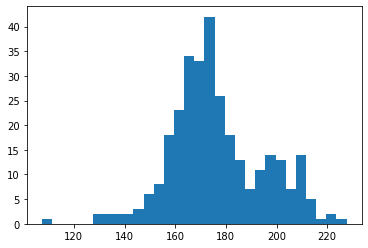

In [137]:
plt.hist(veldis_array, bins=30)

In [141]:
print('systematic uncertainty for population : %d km/s' % int(np.std(veldis_array)))
print('systematic uncertainty for sample : %d km/s' % int(np.std(veldis_array, ddof=1)))

systematic uncertainty for population : 18 km/s
systematic uncertainty for sample : 18 km/s


In [142]:
np.savetxt('B0445_systematic_veldis.txt', np.array(veldis_array), fmt='%f')

In [144]:
print('mean velocity dispersion : %d km/s' % int(np.mean(veldis_array)))

mean velocity dispersion : 176 km/s


## The velocity dispersion value that to be reported is measured using all templates and additive polynomial with degree 9. The degree of the polynomial is decided based on the length of the spectrum which in this case around 2160Ang.


degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       202       176
chi2/DOF: 3.235; degree = 9; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268


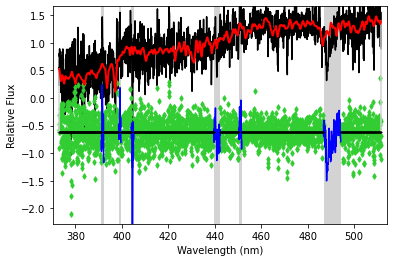

<Figure size 432x288 with 0 Axes>

In [145]:
spec.cal_veldis(temp_spec=temp_spec, degree=[9, 10], mask_reg=mask_reg, show_weight=True, moments=2)

## store best fit data and good pixel values for future use

In [146]:
gdpix = np.pad(spec.goodpixels[0], (0, len(spec.best_fit[0])- len(spec.goodpixels[0])))
np.savetxt('B0445_bestfit_veldis.txt', np.array([spec.best_fit[0], gdpix]), fmt='%f')

In [147]:
fit_data = np.loadtxt('B0445_bestfit_veldis.txt')

6094.700924077325 6110.41991867357
6209.949830761812 6225.237160616133
6294.865696781026 6311.100941316306
6849.327515049698 6890.348455857358
7015.712596258928 7035.4542525746265
7584.668603085531 7700.093736473112


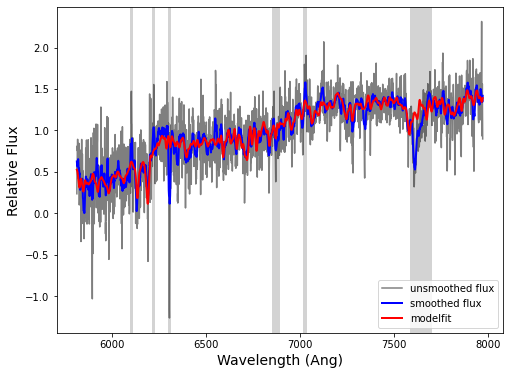

In [148]:
plt.figure(figsize=(8,6))
boxsize=15
x = np.exp(spec.wav_rebinned)*1.558
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
plt.xlabel(r"Wavelength (Ang)", fontsize=14)
plt.ylabel("Relative Flux", fontsize=14)
plt.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=0.5)
plt.plot(x, gal_smooth, color='b', linewidth=2, label='smoothed flux')
plt.plot(x, bst, 'r', linewidth=2, label='modelfit')
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray')
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend()

## Check what is velocity dispersion if the rest wavelength region from 4200-4800 Ang and 5090-5450 Ang are used as Matt suggested.

In [150]:
spec_new = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits')


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  5650.60
 Spectrum End:     8926.60
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



In [151]:
spec_new.closest_wavelength(np.array([[4200, 4800], [5090, 5450]])*1.558)


Given waverange(assumed) : 

6543.6 7478.400000000001
7930.22 8491.1

Closest waverange to the given ones : 

6543.368786033256 7478.7109219387185
7929.834881830917 8491.395443543592


([(6543.368786033256, 7478.7109219387185),
  (7929.834881830917, 8491.395443543592)],
 [(1116, 2285), (2849, 3551)])

In [152]:
spec1 = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[1115, 2286])


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  6542.57
 Spectrum End:     7478.71
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       6707.19
H-gamma       4340.00       6761.72
Fe4383        4383.00       6828.71
Ca4455        4455.00       6940.89
Fe4531        4531.00       7059.30



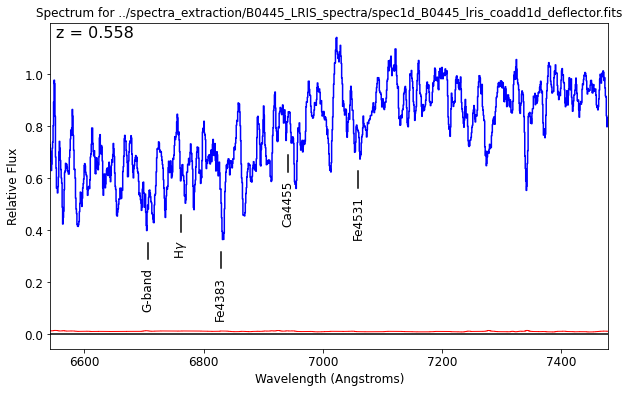

In [153]:
fg = plt.figure(figsize=(10,6))
spec1.smooth(7, fig=fg)
spec1.mark_lines('abs', z=0.558, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 34.266269 km/s


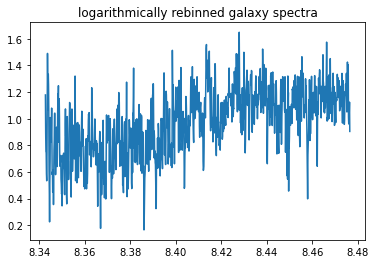

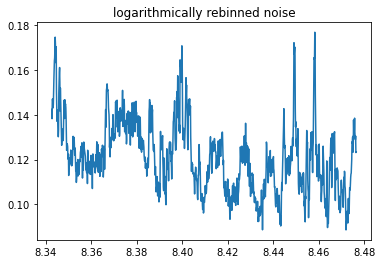

In [157]:
spec1.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.12)

In [159]:
temp_spec1 = spec1.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -57624.378587 

sigma_diff : 2.130182



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       175       140
chi2/DOF: 1.926; degree = 2; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 23; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       178       136
chi2/DOF: 1.926; degree = 3; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 26; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       179       138
chi2/DOF: 1.918; degree = 4; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 38; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        72        86
chi2/DOF: 1.921; degree = 5; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:      

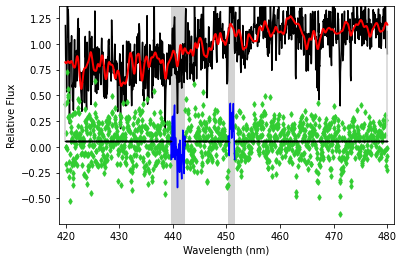

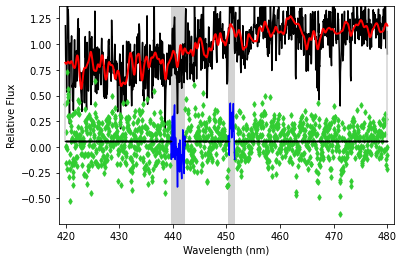

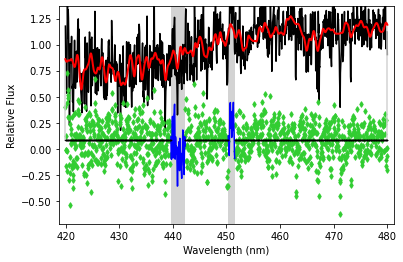

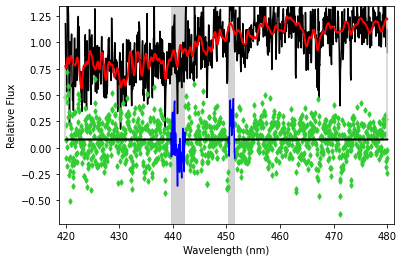

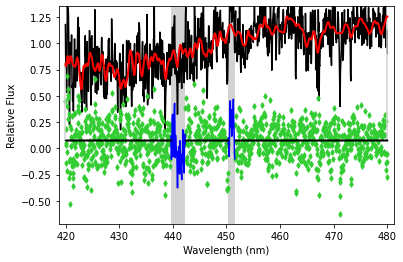

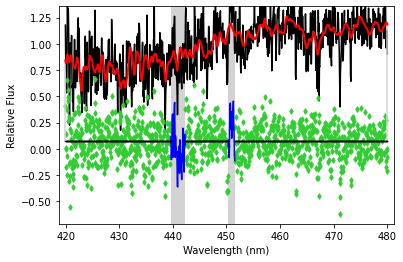

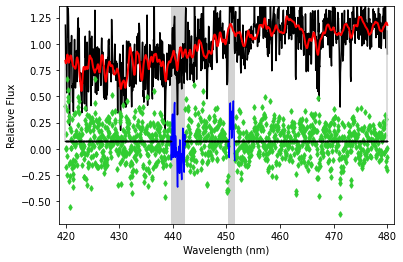

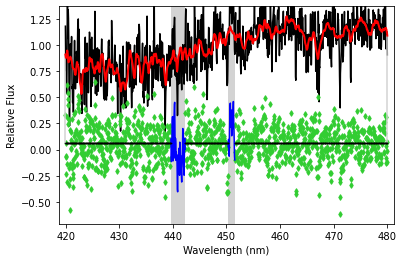

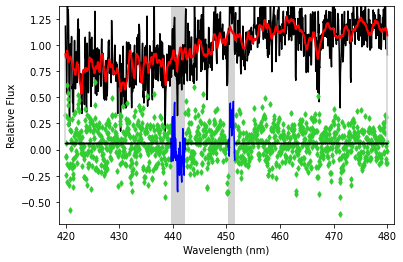

<Figure size 432x288 with 0 Axes>

In [160]:
spec1.cal_veldis(temp_spec=temp_spec1, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

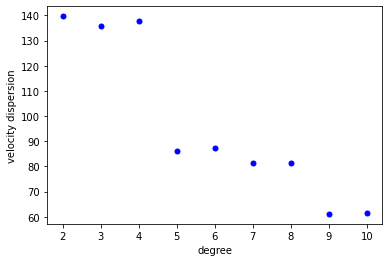

In [162]:
spec1.plot_veldis()

order : 4


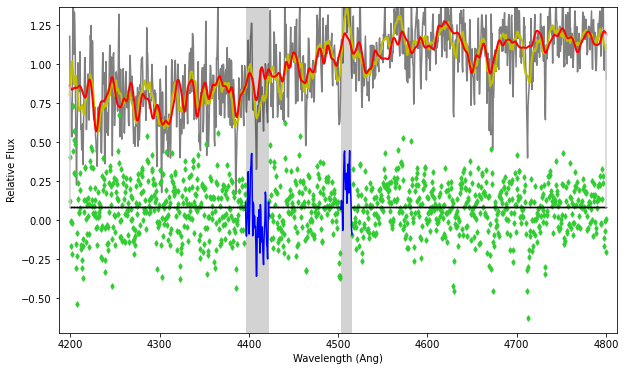

order : 8


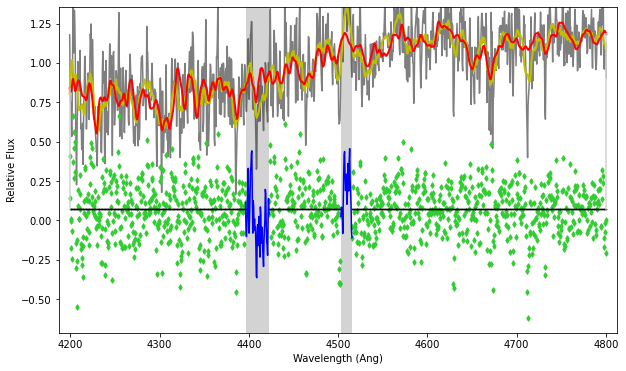

In [161]:
ord_list = np.array([4, 8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec1.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

In [155]:
spec2 = Veldis('../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[2848, 3552])


Reading spectrum from ../spectra_extraction/B0445_LRIS_spectra/spec1d_B0445_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  7929.04
 Spectrum End:     8491.40
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       8064.21



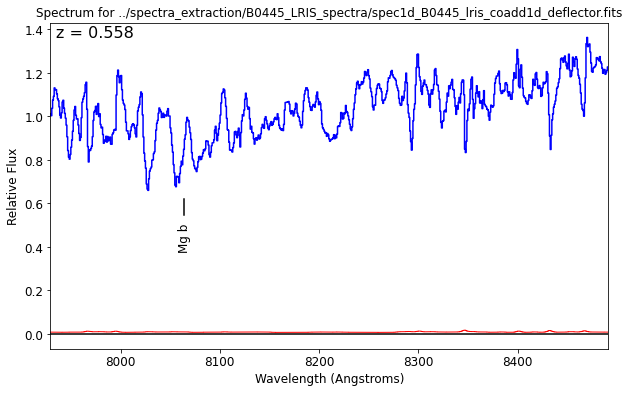

In [156]:
fg = plt.figure(figsize=(10,6))
spec2.smooth(7, fig=fg)
spec2.mark_lines('abs', z=0.558, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 29.221059 km/s


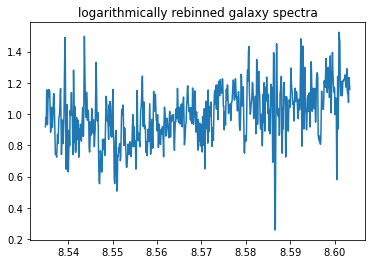

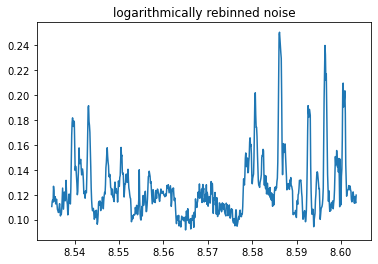

In [158]:
spec2.cal_parm(z=0.558, high_z=True, logscale=False, veldis_start=200, noise_scale=0.12)

In [163]:
temp_spec2 = spec2.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -115244.945627 

sigma_diff : 2.130182


In [164]:
mask_reg2 = np.log(np.array([(6095, 6110), (6210, 6225), (6295, 6311), (6850, 6890),
                            (7016, 7035), (7585, 7700), (8000, 8100)])/1.558) #(6095, 6105)
mask_reg2 #(7581, 7723)

array([[8.27182109, 8.2742791 ],
       [8.29051323, 8.29292577],
       [8.304108  , 8.30664647],
       [8.38860098, 8.39442342],
       [8.41254559, 8.41525002],
       [8.49052494, 8.50557266],
       [8.54379387, 8.55621639]])


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       110       275
chi2/DOF: 0.9460; degree = 2; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  25 / 1267
153, 12.068393

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       108       445
chi2/DOF: 0.9389; degree = 3; mdegree = 0
method = capfit; Jac calls: 13; Func calls: 41; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1267
153, 35.777988
295, 30.222548
320, 19.164309
343, 36.271225
358, 10.931591
382, 19.065674
418, 11.589882
585, 11.987077
631, 24.483375
881, 19.401386
1129, 20.351480
1234, 17.450255

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       211       629
chi2/DOF: 0.9287; degree = 4; mdegree = 0
method = capfit; Jac calls: 17; Func calls: 53; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  23 / 1267
39, 148.698831
48, 107.165898
70, 44.636408
153, 361.374717
250, 78.852574
343, 287.097576
35

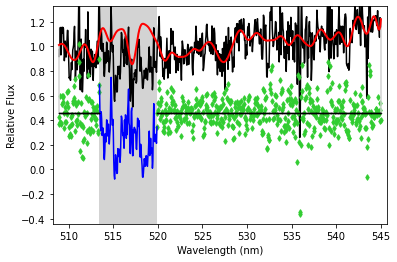

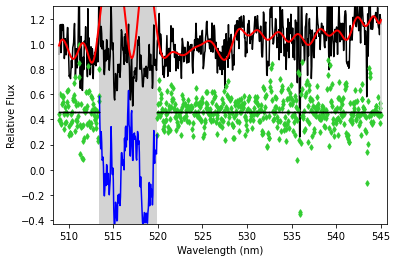

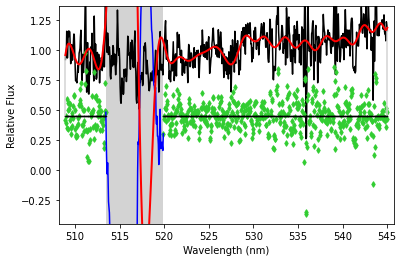

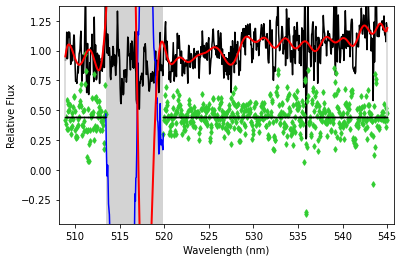

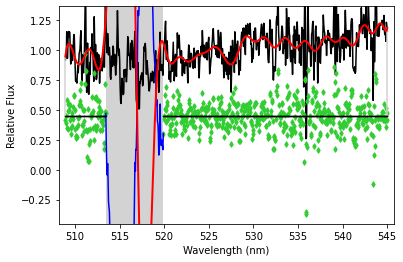

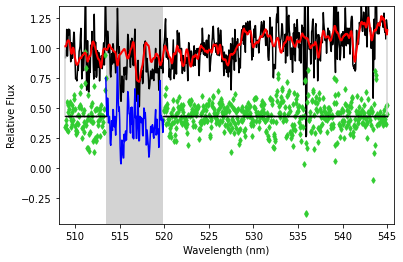

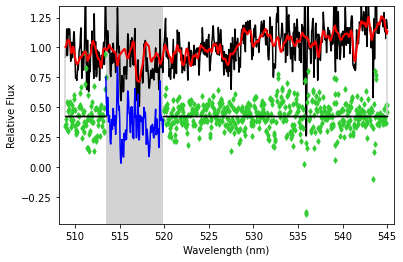

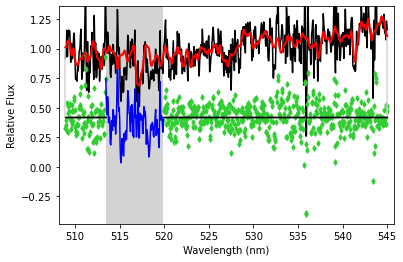

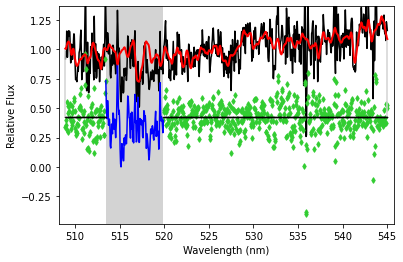

<Figure size 432x288 with 0 Axes>

In [165]:
spec2.cal_veldis(temp_spec=temp_spec2, degree=[2, 11], mask_reg=mask_reg2, show_weight=True, moments=2)


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:        72       131
chi2/DOF: 1.004; degree = 2; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267
991, 176.761152

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:        65       129
chi2/DOF: 1.004; degree = 3; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267
991, 146.375647

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:        66       105
chi2/DOF: 0.9910; degree = 4; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 26; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 1267
991, 1792.195716

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        67       106
chi2/DOF: 0.9910; degree = 5; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 26; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 1267
991, 1431.1

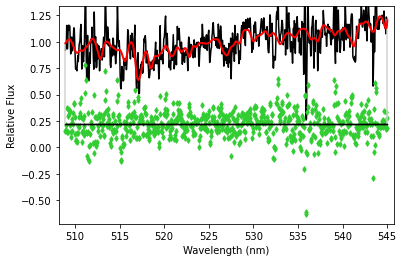

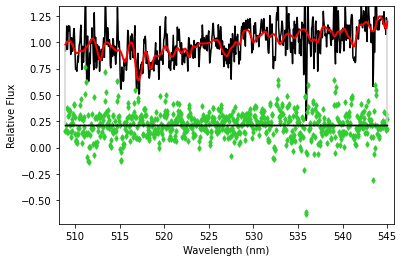

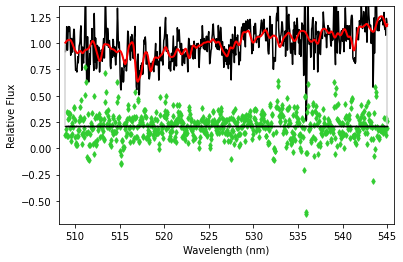

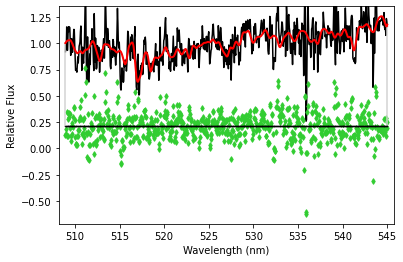

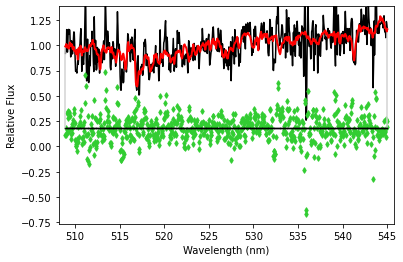

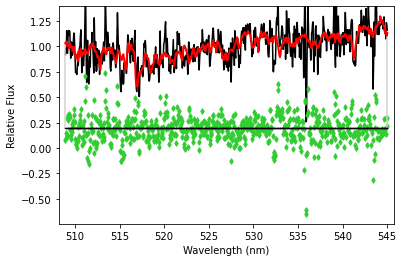

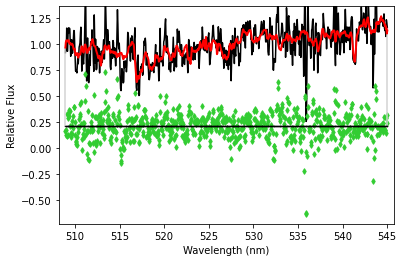

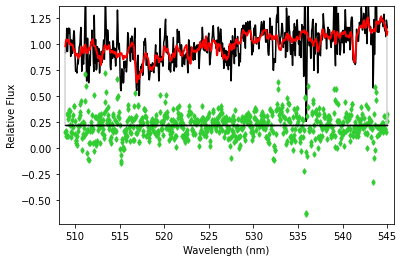

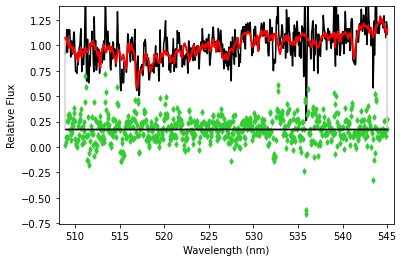

<Figure size 432x288 with 0 Axes>

In [166]:
spec2.cal_veldis(temp_spec=temp_spec2, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

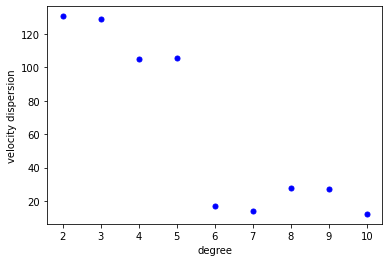

In [169]:
spec2.plot_veldis()